In [2]:
import numpy as np
import pandas as pd
import os

from scipy import stats

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

In [3]:
orderdf = pd.read_csv('ignored_assets/orders.csv', parse_dates = [6,7])

In [14]:
od1 = orderdf[(orderdf['start_district_hash'] == '82cc4851f9e4faa4e54309f8bb73fd7c') & (orderdf['dest_district_hash'] == 'b05379ac3f9b7d99370d443cfd5dcc28')]

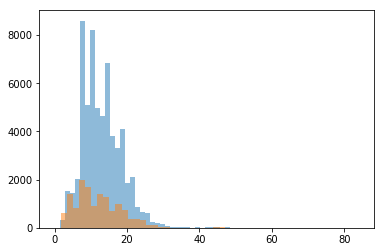

In [15]:
mask = ~pd.isnull(od1['driver_id'])
plt.hist(od1[mask]['price'], bins =50, alpha = 0.5);
plt.hist(od1[~mask]['price'], bins =50, alpha = 0.5);

In [16]:
len(od1['price'])

75855

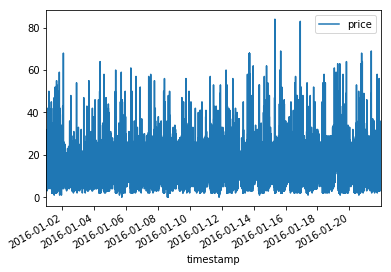

In [17]:
od1[['timestamp','price']].set_index('timestamp').plot();

In [18]:
mask = ~pd.isnull(od1['driver_id'])
plt.scatter(od1[mask]['hour'], od1[mask]['price'], alpha =0.5);
plt.scatter(od1[~mask]['hour'], od1[~mask]['price'], alpha = 0.5);

KeyError: 'hour'

In [427]:
p1 = od1[mask & (od1['hour'] == 4) ]['price']
p2 = od1[mask & (od1['hour'] == 8) ]['price']

In [428]:
stats.ks_2samp(p1, p2)

Ks_2sampResult(statistic=0.34655355417201333, pvalue=1.919844119146097e-11)

In [368]:
print len(p1), p1.mean()

106 17.0283018868


In [369]:
print len(p2), p2.mean()

3573 11.5021550518


In [370]:
p1.mean() / p2.mean()

1.4804444741128211

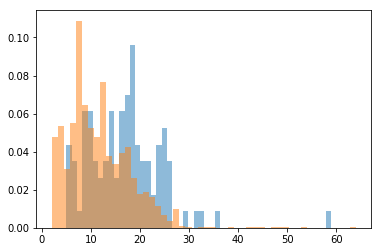

In [371]:
plt.hist(p1, bins =50, alpha = 0.5, normed = True);
plt.hist(p2, bins =50, alpha = 0.5, normed = True);

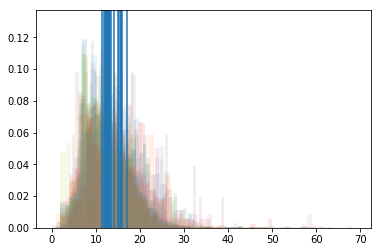

In [349]:
ps = []
ps_std = []
for i in range(24):
    p = od1[mask & (od1['hour'] == i) ]['price']
    plt.hist(p, bins =50, alpha = 0.1, normed = True);
    plt.axvline(x=p.mean());
    ps.append(p.mean())
    ps_std.append(p.std())
    #print i, p.mean()

Ks_2sampResult(statistic=0.067013287117273224, pvalue=0.00078807029682076077)


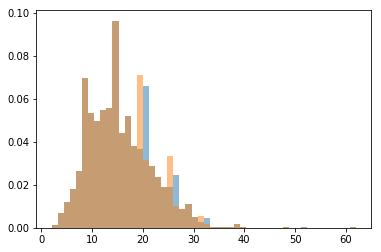

In [382]:
# how do multipliers look like
p1 = p
p2 = p1 * 1.000000000000001
plt.hist(p1, bins =50, alpha = 0.5, normed = True);
plt.hist(p2, bins =50, alpha = 0.5, normed = True);
print stats.ks_2samp(p1, p2)

For detecting surge pricing, ks_2sample sucks

In [455]:
nbins = 25
pricedistr = np.zeros((24, nbins), dtype=np.float64)

for i in range(24):
    p = od1[mask & (od1['hour'] == i) ]['price']
    vals, prices = np.histogram(p, bins =nbins, range= (0,75), normed = True)
    pricedistr[i,:] = vals

In [458]:
prices

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.])

In [474]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

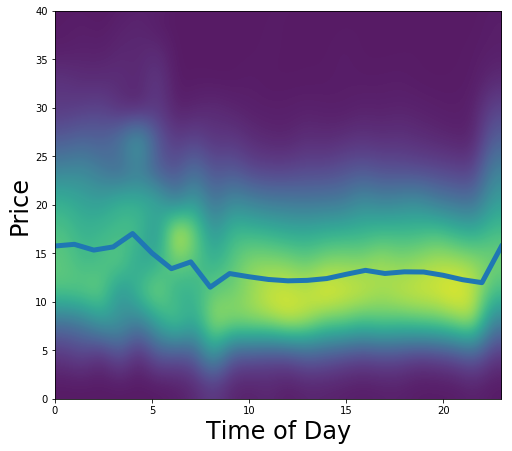

In [499]:
plt.plot(ps, linewidth=5)
plt.imshow(pricedistr.T[:,:], 
           interpolation='bicubic',alpha=0.9, origin = 'lower',
          extent = (0,23,0,78))
plt.ylim(0,40)
plt.xlabel('Time of Day', fontsize = 24)
plt.ylabel('Price', fontsize = 24)
plt.axes().set_aspect(0.5)

In [464]:
help(np.histogram)

Help on function histogram in module numpy.lib.function_base:

histogram(a, bins=10, range=None, normed=False, weights=None, density=None)
    Compute the histogram of a set of data.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines the bin edges, including the rightmost
        edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string from the list below, `histogram` will use
        the method chosen to calculate the optimal bin width and
        consequently the number of bins (see `Notes` for more detail on
        the estimators) from the data that falls within the requested
        range. While the bin width will be optimal for the actua

(0, 25)

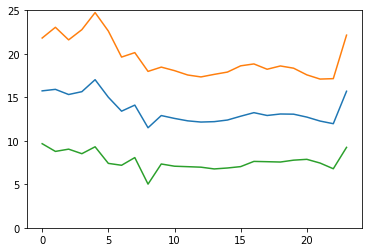

In [351]:
ps = np.array(ps)
ps_std = np.array(ps_std)

plt.plot(ps)
plt.plot(ps + ps_std)
plt.plot(ps - ps_std)
plt.ylim(0,25)

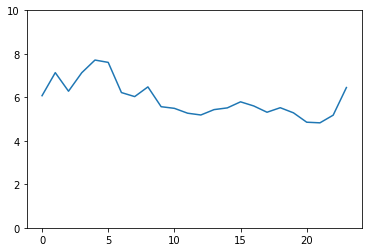

In [355]:
plt.plot(ps_std);
plt.ylim(0,10);

There is surge pricing.

In [332]:
x = pd.unique(p1)

In [333]:
x.sort()

In [429]:
x

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  36.,
        38.,  41.,  43.])

In [327]:
pd.unique(p2)

array([ 10. ,  21. ,   4. ,  20. ,  11. ,   9. ,   7. ,  19. ,  13. ,
        16. ,   8. ,   5. ,   3. ,  18. ,  26. ,  12. ,  17. ,  15. ,
        22. ,  46. ,  14. ,  17.5,  23. ,   6. ,  24. ,   2. ,  27. ,
        57. ,  60. ,  14.6,  26.4])

## Get average trip cost per OD pair per hour of the day

In [275]:
orderdf.columns

Index([u'order_id', u'driver_id', u'passenger_id', u'start_district_hash',
       u'dest_district_hash', u'price', u'timestamp', u'quarter_hour', u'hour',
       u'dayofweek', u'driver_cluster'],
      dtype='object')

In [292]:
ptable = pd.pivot_table(
    orderdf,
    index = ['start_district_hash', 'dest_district_hash'],
    columns = ['hour'],
    aggfunc = [np.mean],
    values = ['price'],
    dropna= True
)

In [293]:
ptable

mean  \
                                                                        price   
hour                                                                       0    
start_district_hash              dest_district_hash                             
08232402614a9b48895cc3d0aeb0e9f2 05280b4a0dd4125c4f3ab97f4e26cab8         NaN   
                                 08232402614a9b48895cc3d0aeb0e9f2   15.944444   
                                 08938a842e0ca3a14075ebd55b13394a   11.250000   
                                 0a4408280f103ae7fad4065de88d049e   16.000000   
                                 13a63563fa89118dffa90dbc7947b541         NaN   
                                 1afd7afbc81ecc1b13886a569d869e8a         NaN   
                                 1cbfbdd079ef93e74405c53fcfff8567         NaN   
                                 2301bc920194c95cf0c7486e5675243c         NaN   
                                 2308e5edf2fbee52203b5c262f557ddf         NaN   
                                 2350be163432e42270d2670cb3c02f80         NaN   
                                 2407d482f0ffa22a947068f2551fe62c         NaN   
                                 2498d22093591889d753dc151de1add9         NaN   
                                 25eb76c9b9b6c60e055ace93f289ca19         NaN   
                                 2920ece99323b4c111d6f9affc7ea034         NaN   
                                 2b9ef61883e80c38eb9a49e2dd56ba89         NaN   
                                 307afa4120c590b3a46cf4ff5415608a         NaN   
                                 3528a3093d9166b20436940c5cb3d2f4         NaN   
                                 3598fb0240ae9e80e80f5423486be0ba         NaN   
                                 364bf755f9b270f0f9141d1a61de43ee         NaN   
                                 38cfb58bf3a8fe1f69c60bfed1442e6a         NaN   
                                 38d5ad2d22b61109fd8e7b43cd0e8901   46.600000   
                                 3a43dcdff3c0b66b1acb1644ff055f9d         NaN   
                                 3e12208dd0be281c92a6ab57d9a6fb32   30.444444   
                                 4396399c0f387a843c4de6052b51a69c         NaN   
                                 44c097b7bd219d104050abbafe51bd49         NaN   
                                 4725c39a5e5f4c188d382da3910b3f3f   60.250000   
                                 49ac89aa860c27e26c0836cb8dab2df2         NaN   
                                 4f4041f7db0c7f69892d9b74c1a7efa1         NaN   
                                 52a4e8aaa12f70020e889aed8fd5ddbc         NaN   
                                 52d7b69796362a8ed1691a6cc02ddde4   19.000000   
...                                                                       ...   
fff4e8465d1e12621bc361276b6217cf 953a9630ac8613828c8a08d126de72b0   28.000000   
                                 9868717243779473e6699d8a7bfce66f         NaN   
                                 a01d1425bf21f16edc6055817badd907   42.500000   
                                 a5609739c6b5c2719a3752327c5e33a7         NaN   
                                 a735449c5c09df639c35a7d61fad3ee5         NaN   
                                 b05379ac3f9b7d99370d443cfd5dcc28         NaN   
                                 b26a240205c852804ff8758628c0a86a         NaN   
                                 b619f3998dcc37c22c97acd2cede085a         NaN   
                                 b702e920dcd2765e624dc1ce3a770512         NaN   
                                 ba32abfc048219e933bee869741da911  235.000000   
                                 c05d7bbbf694c1578aad3da25abf86a7         NaN   
                                 c4ec24e0a58ebedaa1661e5c09e47bb5         NaN   
                                 c6f7f7fbda7471d94e60fbbd09df8c90   15.000000   
                                 ca064c2682ca48c6a21de012e87c0df5   38.000000   
                                 cb7c46510d7a16ce80dd9f00973931ba         NaN   
                       

In [294]:
len(orderdf['start_district_hash'].unique())

66

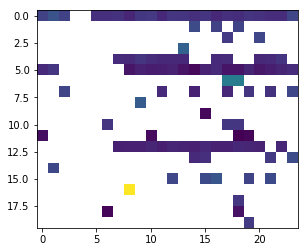

In [295]:
plt.imshow(ptable.as_matrix()[50:70])

### ALL

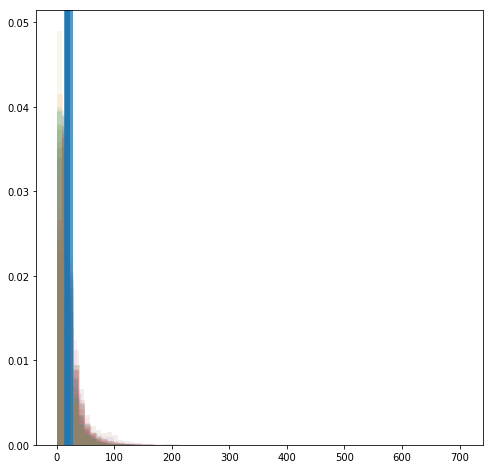

In [4]:
ps = []
ps_std = []
mask = ~pd.isnull(orderdf['driver_id'])
for i in range(24):
    p = orderdf[mask & (orderdf['hour'] == i) ]['price']
    plt.hist(p, bins =50, alpha = 0.1, normed = True);
    plt.axvline(x=p.mean());
    ps.append(p.mean())
    ps_std.append(p.std())
    #print i, p.mean()

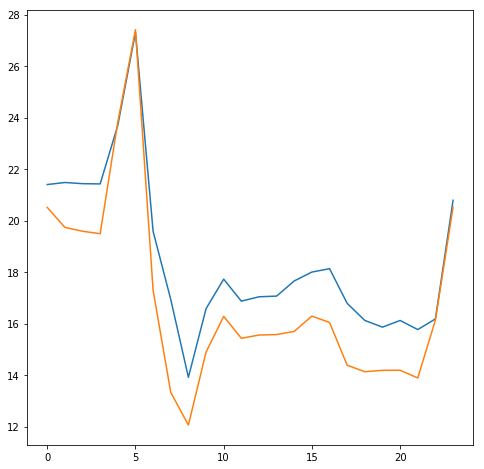

In [8]:
plt.plot(ps)
plt.plot(ps_std)

In [24]:
(orderdf['price'] > 5.0).sum()

7788986